In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("financial_transactions.csv")
print(df.head())

   transaction_id        date  customer_id   amount    type  \
0               1  26-10-2020          NaN      NaN  credit   
1               2  08-01-2020        466.0  1255.95  credit   
2               3  02-09-2019        110.0  7969.68   debit   
3               4  02-12-2020        142.0  2927.41  credit   
4               5  02-12-2020        944.0  4661.88   debit   

                                         description  
0                 Expect series shake art again our.  
1               Each left similar likely coach take.  
2  Direction wife job pull determine leader move ...  
3                    Agree reveal buy black already.  
4       Child relationship show college whom speech.  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  100000 non-null  int64  
 1   date            100000 non-null  object 
 2   customer_id     99999 non-null   float64
 3   amount          99999 non-null   float64
 4   type            100000 non-null  object 
 5   description     100000 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.6+ MB
None


In [5]:
print(df.describe())

       transaction_id   customer_id        amount
count   100000.000000  99999.000000  99999.000000
mean     50000.500000    499.590446   5008.998074
std      28867.657797    288.971802   2888.454359
min          1.000000      1.000000      1.290000
25%      25000.750000    249.000000   2514.565000
50%      50000.500000    499.000000   5006.130000
75%      75000.250000    750.000000   7513.880000
max     100000.000000   1000.000000  10000.000000


In [3]:
df = df.dropna(subset=['customer_id'])
df['customer_id'] = df['customer_id'].astype(int)
df['amount'] = df['amount'].fillna(0)
print(df.head())

   transaction_id        date  customer_id   amount    type  \
1               2  08-01-2020          466  1255.95  credit   
2               3  02-09-2019          110  7969.68   debit   
3               4  02-12-2020          142  2927.41  credit   
4               5  02-12-2020          944  4661.88   debit   
5               6  25-04-2021          900  3649.68  credit   

                                         description  
1               Each left similar likely coach take.  
2  Direction wife job pull determine leader move ...  
3                    Agree reveal buy black already.  
4       Child relationship show college whom speech.  
5                                Century front item.  


In [6]:
print(df.isnull().sum())

transaction_id    0
date              0
customer_id       1
amount            1
type              0
description       0
dtype: int64


In [4]:
customer_data = df.groupby('customer_id').agg(
    total_spent=('amount', 'sum'),
    avg_transaction=('amount', 'mean'),
    transaction_count=('amount', 'count')
).reset_index()
print(customer_data.head())

   customer_id  total_spent  avg_transaction  transaction_count
0            1    481760.83      4966.606495                 97
1            2    493403.13      4699.077429                105
2            3    547765.88      5071.906296                108
3            4    505827.29      5558.541648                 91
4            5    527998.55      4934.565888                107


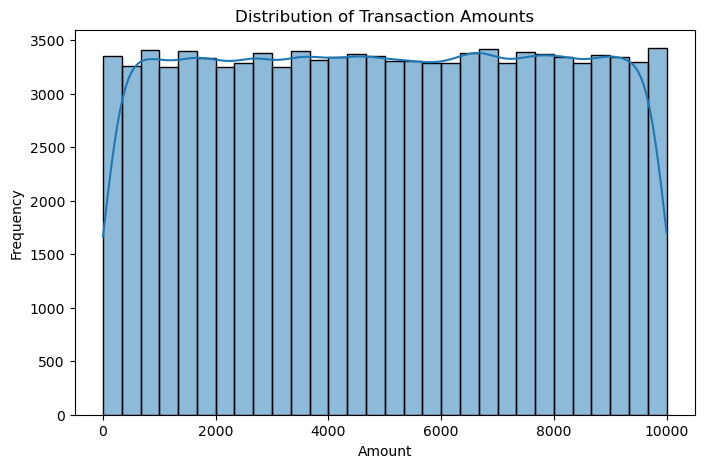

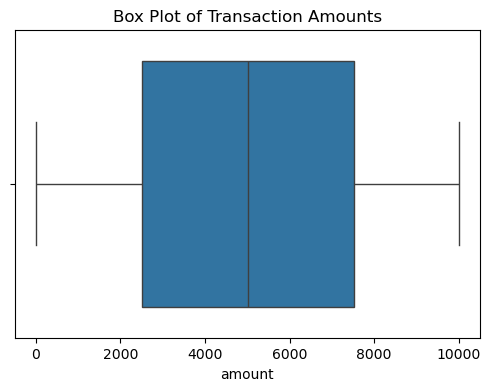

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['amount'])
plt.title('Box Plot of Transaction Amounts')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering
features = ['total_spent', 'avg_transaction', 'transaction_count']

# Apply StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[features])

# Convert back to DataFrame
X_scaled = pd.DataFrame(scaled_features, columns=features)

# Display scaled data
print(X_scaled.head())

   total_spent  avg_transaction  transaction_count
0    -0.332662        -0.139750          -0.308878
1    -0.130250        -1.029719           0.515072
2     0.814898         0.210543           0.824053
3     0.085756         1.829395          -0.926841
4     0.471224        -0.246337           0.721059


In [13]:
import os
os.environ["OMP_NUM_THREADS"] = "4"  # Limit to 4 threads


C:\Users\Yalamanchili Siddu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Yalamanchili Siddu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Yalamanchili Siddu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Yalamanchili Siddu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarn

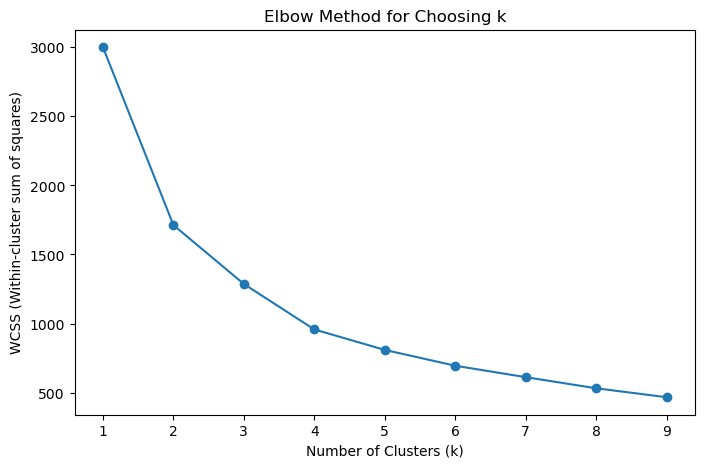

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Try different values of k
wcss = []  # Within-cluster sum of squares
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title("Elbow Method for Choosing k")
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_data['cluster'] = kmeans.fit_predict(scaled_features)
# Show clustered data
print(customer_data)

     customer_id  total_spent  avg_transaction  transaction_count  cluster
0              1    481760.83      4966.606495                 97        1
1              2    493403.13      4699.077429                105        1
2              3    547765.88      5071.906296                108        2
3              4    505827.29      5558.541648                 91        0
4              5    527998.55      4934.565888                107        2
..           ...          ...              ...                ...      ...
995          996    445988.18      4744.555106                 94        1
996          997    495530.38      5005.357374                 99        0
997          998    460563.98      5355.395116                 86        0
998          999    513823.67      5466.209255                 94        0
999         1000    529241.20      5040.392381                105        2

[1000 rows x 5 columns]


C:\Users\Yalamanchili Siddu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


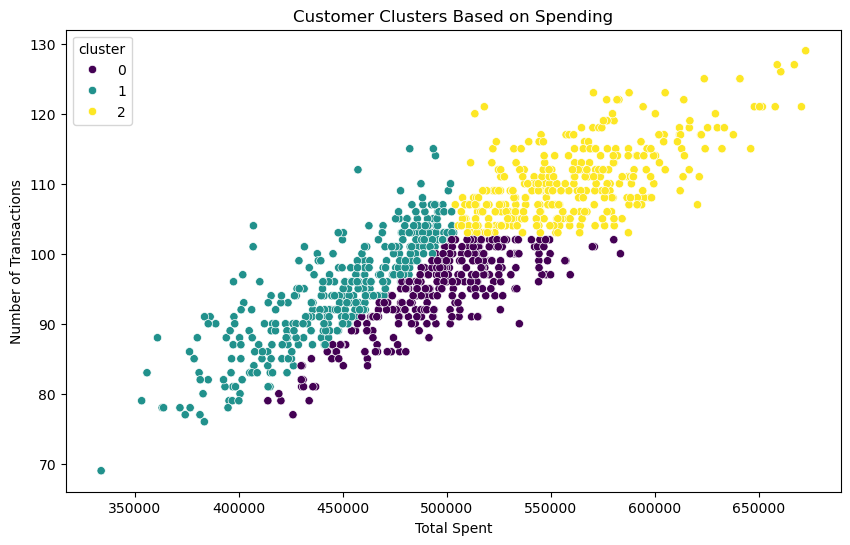

In [18]:
import seaborn as sns
# Scatter plot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_data['total_spent'],
    y=customer_data['transaction_count'],
    hue=customer_data['cluster'],
    palette="viridis"
)
plt.xlabel("Total Spent")
plt.ylabel("Number of Transactions")
plt.title("Customer Clusters Based on Spending")
plt.show()

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
customer_data["cluster"] = kmeans.fit_predict(X_scaled)
if len(set(customer_data["cluster"])) > 1:
    silhouette_avg = silhouette_score(X_scaled, customer_data["cluster"])
    calinski_score = calinski_harabasz_score(X_scaled, customer_data["cluster"])
    davies_bouldin = davies_bouldin_score(X_scaled, customer_data["cluster"])
    accuracy_score = (silhouette_avg + 1) * 50  

    # Print clustering evaluation
    print("\n🔹 KMeans Clustering Evaluation")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Calinski-Harabasz Score: {calinski_score:.2f}")
    print(f"Davies-Bouldin Score: {davies_bouldin:.4f} (lower is better)")
    print(f"Estimated Clustering Accuracy: {accuracy_score:.2f}%")
else:
    print("KMeans found only one cluster. Try adjusting parameters.")



🔹 KMeans Clustering Evaluation
Silhouette Score: 0.3253
Calinski-Harabasz Score: 664.10
Davies-Bouldin Score: 1.0156 (lower is better)
Estimated Clustering Accuracy: 66.27%


C:\Users\Yalamanchili Siddu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
